                                  WINE DATA ANALYSIS

In [48]:
#Load the data
import pandas as pd
import numpy as np
wine = pd.read_csv('/home/lewis/Desktop/ENV/ven/DATA_SCIENCE/WINE ANALYSIS/wine.csv')
wine.drop(['Wine'], axis=1, inplace=True)
wine.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [49]:
wine.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


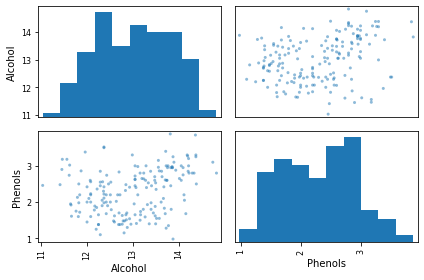

In [50]:
#Plotting the Data
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0,5]])

figsize=(20,20)
plt.tight_layout()
plt.show()

Standardization Preprocessing

In [51]:
x = wine[['Alcohol', 'Phenols']]

#Standardize the data z=(x-mean)/STD
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() #Instantiate the scaler
#Compute the mean and STD to be used later for scaling
scale.fit(x)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
print(scale.mean_) #mean
print(scale.scale_) #STD


[13.00061798  2.29511236]
[0.80954291 0.62409056]


In [53]:
# The raw alcohol has a mean of 13 and a STD of 0.81
# The Phenols are centered at 2.29 with a STD of 0.62

In [54]:
# Fit to the training data
x_scaled = scale.transform(x)
print(x_scaled)

[[ 1.51861254  0.80899739]
 [ 0.24628963  0.56864766]
 [ 0.19687903  0.80899739]
 [ 1.69154964  2.49144552]
 [ 0.29570023  0.80899739]
 [ 1.48155459  1.56209322]
 [ 1.71625494  0.32829793]
 [ 1.3086175   0.48853108]
 [ 2.25977152  0.80899739]
 [ 1.0615645   1.09741707]
 [ 1.3580281   1.04934713]
 [ 1.38273339 -0.15240153]
 [ 0.92568536  0.48853108]
 [ 2.16095032  1.28969686]
 [ 1.70390229  1.61016317]
 [ 0.77745356  0.88911397]
 [ 1.60508109  0.80899739]
 [ 1.02450655  1.04934713]
 [ 1.46920194  1.61016317]
 [ 0.78980621  0.64876424]
 [ 1.3086175   1.1294637 ]
 [-0.08723191  0.18408809]
 [ 0.87627476  0.5045544 ]
 [-0.18605311  0.2962513 ]
 [ 0.61686912  0.37636788]
 [ 0.06099988  0.53660103]
 [ 0.48098997  0.88911397]
 [ 0.36981612  0.16806478]
 [ 1.07391715  1.04934713]
 [ 1.2592069   0.56864766]
 [ 0.90098006  1.1294637 ]
 [ 0.71569031  0.90513729]
 [ 0.83921681  0.20011141]
 [ 0.93803801  1.04934713]
 [ 0.62922177  0.0879482 ]
 [ 0.59216382  0.64876424]
 [ 0.34511082  0.48853108]
 

In [55]:
# Sanity check to see if each feature is centered at 0 and STD of 1
print(x_scaled.mean(axis=0))
print(x_scaled.std(axis=0))

[-8.38280756e-16  0.00000000e+00]
[1. 1.]


K-Means Modeling

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  #Instantiate the model
kmeans.fit(x_scaled)  #fit the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
y_pred = kmeans.predict(x_scaled)  #Make predictions
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 1 2 1 2 0 1 0 1
 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [58]:
print(kmeans.cluster_centers_)   #To inspect the coordinated of the three centroids


[[ 0.07498401 -1.14070754]
 [ 0.92017418  0.87087204]
 [-1.06309124  0.06418028]]


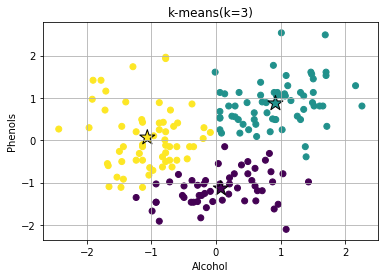

In [59]:
#Visualize the scaled data
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y_pred)  #plot the scaled data
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=250, c=[0,1,2], edgecolors='k')  #Identify the centroids
plt.xlabel('Alcohol')
plt.ylabel('Phenols')
plt.title('k-means(k=3)')
plt.grid()
plt.show()

In [60]:
# Low Alcohol but high Phenols - Upper right in Green
# High Alcohol but high Phenols - Upper left in Yellow
# Low Phenols - Bottom Purple

In [61]:
# Predictions for new wine with Alcohol at 13 and Phenols at 2.5
x_new = np.array([[13, 2.5]])

#Standardize the new data
x_new_scaled = scale.transform(x_new)
#Predict the cluster of the new wine
kmeans.predict(x_new_scaled)

array([1], dtype=int32)

Optimal k: The Elbow Method

In [62]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_scaled)

#Sum of squares of the distance from data point to its nearest centroid
kmeans .inertia_

185.25081541190127

In [63]:
#When k=3, the distortion decreases
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)
kmeans.inertia_

114.37290289645736

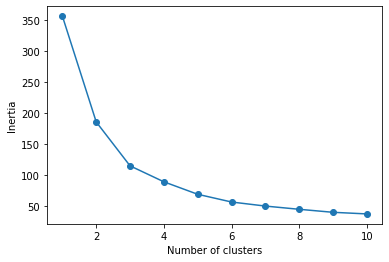

In [64]:
#Plot the intertia for different values of k
import numpy as np

#Calculate distortion for a range of number of cluster
inertia = []

for i in np.arange(1, 11):
    km = KMeans(
        n_clusters= i
    )
    km.fit(x_scaled)
    inertia.append(km.inertia_)
#Plot
plt.plot (np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
# The inertia decreases as the number of clusters increases.
# The optimal k should be where the inertia nolonger decreases as rapidly.


Modeling with more Features

In [66]:
x = wine

#Standardize each scale
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)
print(x_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


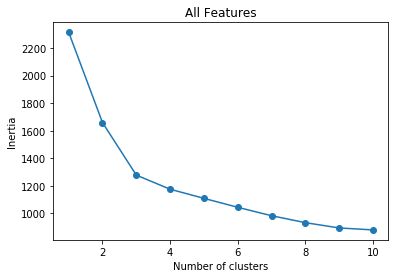

In [67]:
#Plot the inertia for a range of k to determine the optimal k via elbow method
inertia = []

for i in np.arange(1, 11):
    km = KMeans(
        n_clusters= i
    )
    km.fit(x_scaled)
    inertia.append(km.inertia_)
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('All Features')
plt.show()

In [68]:
#Inertia nolonger decreases as rapidly after k=3

In [69]:
#We finalise the model by setting n_clusters=3 and obtain the predictions
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(x_scaled)
y_pred = kmeans.predict(x_scaled)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Compared to the predictions using only two features, the two models produce very similar results. The 21 wines are predicted to belong to the same cluster from both models, so are the last 19 wines. Only 13 out of 178 wines were clustered differently by the two models.